In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#cleaning data aka preprocessing

In [3]:
filepath = 'laptop_data.csv'
if not os.path.exists(filepath):
    print('File not found')
else:
    df = pd.read_csv(filepath, index_col=0)
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   984 non-null    object
 1   price   984 non-null    object
 2   link    984 non-null    object
dtypes: object(3)
memory usage: 30.8+ KB
None


In [4]:
df[df['title'].duplicated()] # list all the duplicated titles

,title,price,link
27,MSI Modern 14 Core i5 10th Gen - (8 GB/512 GB ...,"₹41,990",/msi-modern-14-core-i5-10th-gen-8-gb-512-gb-ss...
33,ASUS Vivobook 14 Core i3 10th Gen - (8 GB/1 TB...,"₹29,990",/asus-vivobook-14-core-i3-10th-gen-8-gb-1-tb-h...
35,ASUS VivoBook 14 (2021) Ryzen 7 Quad Core 3700...,"₹46,990",/asus-vivobook-14-2021-ryzen-7-quad-core-3700u...
39,MSI Bravo 15 Ryzen 5 Hexa Core 5600H - (8 GB/5...,"₹49,990",/msi-bravo-15-ryzen-5-hexa-core-5600h-8-gb-512...
43,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,"₹59,990",/lenovo-ideapad-gaming-3-ryzen-5-hexa-core-560...
...,...,...,...
968,DELL Inspiron Core i5 11th Gen - (8 GB/512 GB ...,"₹78,990",/dell-inspiron-core-i5-11th-gen-8-gb-512-gb-ss...
971,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,"₹54,590",/lenovo-ideapad-gaming-core-i5-11th-gen-8-gb-5...
975,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 ...,"₹48,590",/lenovo-ideapad-3-ryzen-5-hexa-core-5500u-8-gb...
978,HP 15 Core i7 8th Gen - (8 GB/1 TB HDD/128 GB ...,"₹1,16,941",/hp-15-core-i7-8th-gen-8-gb-1-tb-hdd-128-gb-ss...


# f(x) = x*2

f(5)
f(230)
f(0.5)
lambda expressions

f = lambda x: x*2
f(5)
f(230)

In [5]:
f = lambda i : i * 4
print(f(4))
g = lambda x,y : x + y ** 2
print(g(2,3))

16
11


In [6]:
df['price_clean'] = df['price'].apply(lambda val: int(val[1:].replace(',', '')))

In [7]:
df.columns

Index(['title', 'price', 'link', 'price_clean'], dtype='object')

In [8]:
df.sort_values(by='price_clean', ascending=False, inplace=True)

In [9]:
df.tail()

,title,price,link,price_clean
16,Infinix INBook X1 Neo Series Celeron Quad Core...,"₹18,990",/infinix-inbook-x1-neo-series-celeron-quad-cor...,18990
593,Avita SATUS ULTIMUS S111 Celeron Dual Core - (...,"₹18,990",/avita-satus-ultimus-s111-celeron-dual-core-4-...,18990
797,Lenovo APU Dual Core E2 E2-9000 7th Gen - (4 G...,"₹18,890",/lenovo-apu-dual-core-e2-e2-9000-7th-gen-4-gb-...,18890
517,Lenovo IdeaPad 3 Chromebook Celeron Dual Core ...,"₹16,990",/lenovo-ideapad-3-chromebook-celeron-dual-core...,16990
492,Lenovo IdeaPad 3 Chromebook Celeron Dual Core ...,"₹16,990",/lenovo-ideapad-3-chromebook-celeron-dual-core...,16990


In [10]:
def clean_title(title):
    return title.split('-')[0].strip() , title.split('-')[1].strip()

df[['name', 'configuration']] = df['title'].apply(clean_title).apply(pd.Series)

In [11]:
def get_brand(name):
    return name.split()[0]

df['brand'] = df['name'].apply(get_brand)

In [12]:
df['brand'].value_counts()

ASUS         327
Lenovo       171
MSI          126
DELL         117
HP           115
acer          54
APPLE         27
Infinix       17
realme         7
Vaio           5
LG             4
Avita          4
RedmiBook      3
SAMSUNG        2
ALIENWARE      2
Nokia          2
Mi             1
Name: brand, dtype: int64

<AxesSubplot: title={'center': 'Brand Distribution'}>

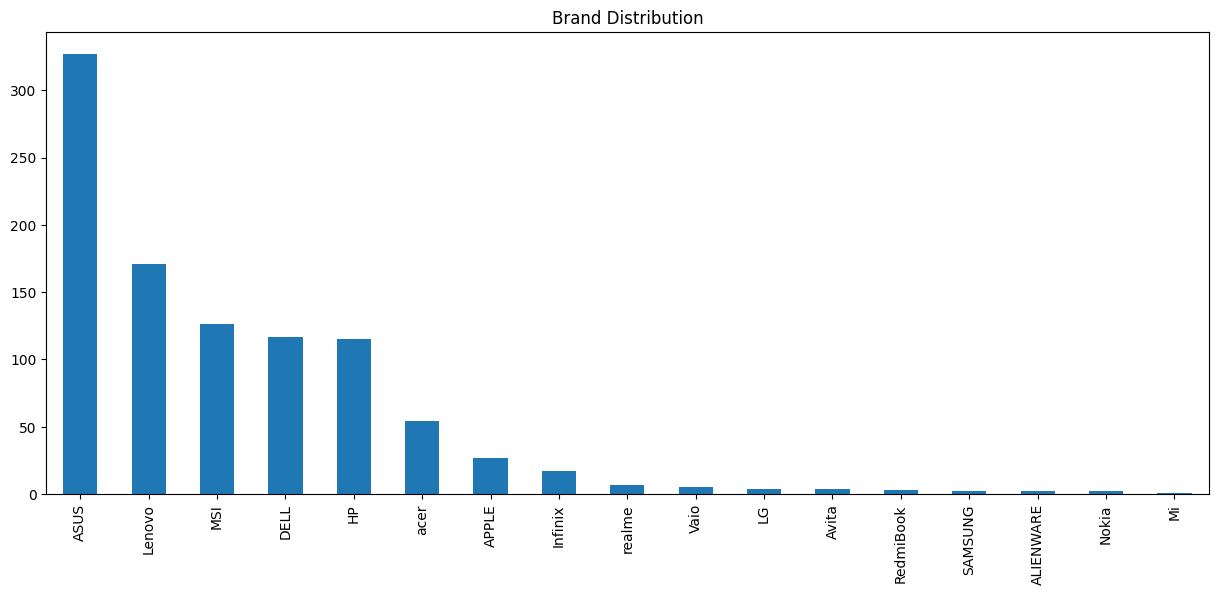

In [13]:
df['brand'].value_counts().plot(kind='bar', title='Brand Distribution', figsize=(15,6))

<AxesSubplot: title={'center': 'Price Distribution'}>

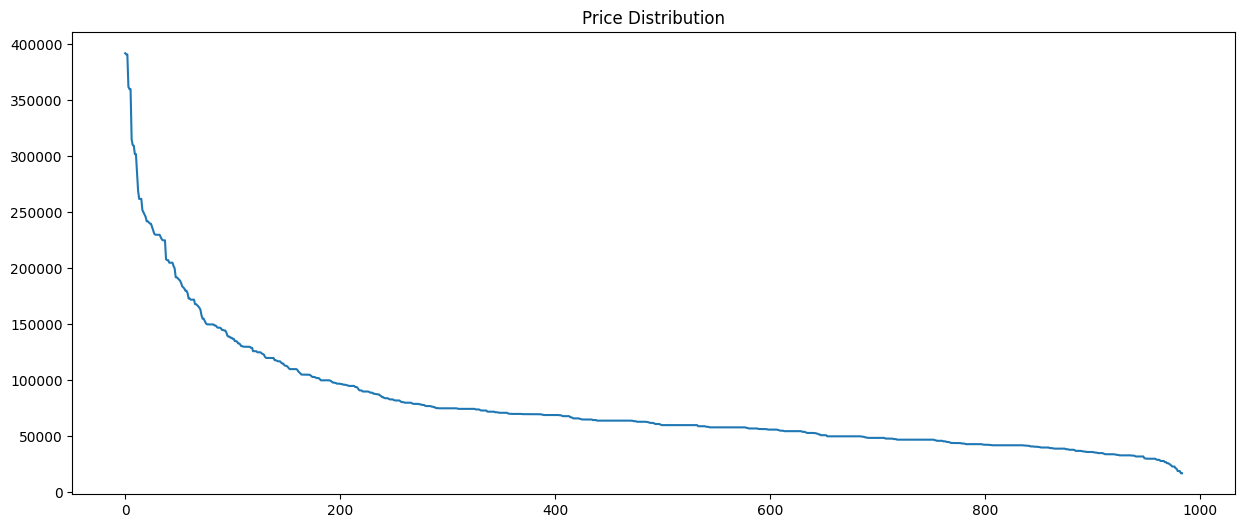

In [14]:
df['price_clean'].plot(
    kind='line', 
    use_index=False,
    title='Price Distribution', 
    figsize=(15,6))

<AxesSubplot: >

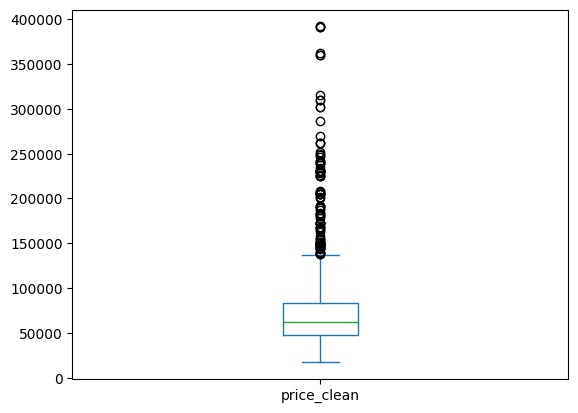

In [15]:
df['price_clean'].plot(kind='box')